

1.   Data cleaning functions
2.   Tokenization & Lemmatization
3. StopWords
4. POS Tagging
5. NER
6. Sentiment Analysis
7. RAKE
8. KeyBERT



In [1]:
!pip3 install rake-nltk

In [2]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cache

##Libraries

In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import ne_chunk

import re

#import stanza
from rake_nltk import Rake
from keybert import KeyBERT

In [4]:
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

##Load Data

In [5]:
# Load the dataset
df = pd.read_csv('speaker_speeches.csv')

In [6]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate


In [7]:
df.isnull().sum()

            0
Speaker     0
Speech      0
Date        0
Type        0
Gender      0
Party       0
Category    0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Speaker,Speech,Date,Type,Gender,Party,Category
0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue
1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action
2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action
3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate
4,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate


##Preprocessing

In [8]:
# Storing the original speech
df['original_speech'] = df['Speech']

In [9]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category,original_speech
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue,This is a country characterised by devotion. T...
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action,I would like to speak about Lord Rama and the...
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action,I would like to express my gratitude to you f...
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate,Lord Ram is a symbol of dignity. Lord Shri Ra...
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate,Unprecedented work has been done during the 1...


In [10]:
def removeNumbers(data):
	return ''.join([i for i in data if not i.isdigit()])

def toLowerCase(data):
	return data.lower()

def removeWhiteSpace(data):
	return data.replace(" ","")

def removeNewLine(data):
	return data.replace("\n","")

def getUpperCharacters(data):
	return ''.join(c for c in data if c.isupper())

def removeSpecialCharacters(data):
	data = re.sub('[^a-zA-Z0-9 \n\.]', '', data)
	return data

def removePunctuation(data):
    data = re.sub(r'[^\w\s]', '', data)
    return data

In [11]:
df['Preprocessed_Speech'] = df['Speech'].apply(toLowerCase)
df['Preprocessed_Speech'] = df['Preprocessed_Speech'].apply(removeSpecialCharacters)
df['Preprocessed_Speech'] = df['Preprocessed_Speech'].apply(removeNewLine)
df['Preprocessed_Speech'] = df['Preprocessed_Speech'].apply(removeNumbers)
df['Preprocessed_Speech'] = df['Preprocessed_Speech'].apply(removePunctuation)

In [12]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category,original_speech,Preprocessed_Speech
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue,This is a country characterised by devotion. T...,this is a country characterised by devotion th...
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action,I would like to speak about Lord Rama and the...,i would like to speak about lord rama and the...
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action,I would like to express my gratitude to you f...,i would like to express my gratitude to you f...
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate,Lord Ram is a symbol of dignity. Lord Shri Ra...,lord ram is a symbol of dignity lord shri ram...
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate,Unprecedented work has been done during the 1...,unprecedented work has been done during the t...


In [13]:
df['Preprocessed_Speech'][1]

'i would like to speak about lord  rama and the importance of the eternal teachings of lord rama as depicted in the  ramayana his reign termed as ram rajya symbolized good governance and  epitomised justice welfare and happiness for all the leadership of lord rama was  dedicated to fairness compassion and the welfare of his people above all else the  lord venkateshwara temple in my parliamentary constituency at tirupati is one of  the most famous temples in our country anjanadri hill one of the seven hills is  supposed to be the birthplace of hanuman another location lepakshi is referenced  in the ramaana which stands as a testament to the widespread reverence of lord  ramas legacy  by developing these sites we will enhance indias cultural heritage  tourism as well as reinforce the bonds of unity and spirituality inspired by lord  rama we request the government for comprehensive development and better  connectivity to all religious sites nationwide to further enrich our cultural herita

###Tokenization & Lemmatization

In [14]:
# Tokenization function using Stanza
df['Tokenized_Speech'] = df['Preprocessed_Speech'].apply(word_tokenize)

In [15]:
df['Tokenized_Speech'][0]

['this',
 'is',
 'a',
 'country',
 'characterised',
 'by',
 'devotion',
 'this',
 'country',
 'is',
 'a',
 'country',
 'of',
 'faith',
 'in',
 'this',
 'country',
 'we',
 'bind',
 'our',
 'diversity',
 'with',
 'goodwill',
 'and',
 'cherish',
 'the',
 'society',
 'with',
 'a',
 'sense',
 'of',
 'service',
 'lord',
 'rama',
 'belongs',
 'to',
 'everyone',
 'and',
 'he',
 'is',
 'with',
 'us',
 'all',
 'the',
 'time',
 'when',
 'we',
 'meet',
 'each',
 'other',
 'we',
 'exchange',
 'greetings',
 'by',
 'saying',
 'ramram',
 'in',
 'north',
 'india',
 'or',
 'western',
 'india',
 'what',
 'is',
 'mahatma',
 'gandhis',
 'definition',
 'of',
 'ram',
 'rajya',
 'where',
 'everyone',
 'is',
 'happy',
 'and',
 'no',
 'one',
 'is',
 'sad',
 'this',
 'is',
 'his',
 'definition',
 'gandhi',
 'ji',
 'has',
 'also',
 'said',
 'that',
 'his',
 'hindu',
 'dharma',
 'teaches',
 'him',
 'to',
 'respect',
 'all',
 'religions',
 'the',
 'secret',
 'of',
 'ram',
 'rajya',
 'is',
 'inherent',
 'in',
 'this

In [16]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

#lemmatize the speech using NLTK
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df['Lemmatized_Speech'] = df['Preprocessed_Speech'].apply(lemmatize_text)

In [17]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category,original_speech,Preprocessed_Speech,Tokenized_Speech,Lemmatized_Speech
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue,This is a country characterised by devotion. T...,this is a country characterised by devotion th...,"[this, is, a, country, characterised, by, devo...","[this, is, a, country, characterised, by, devo..."
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action,I would like to speak about Lord Rama and the...,i would like to speak about lord rama and the...,"[i, would, like, to, speak, about, lord, rama,...","[i, would, like, to, speak, about, lord, rama,..."
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action,I would like to express my gratitude to you f...,i would like to express my gratitude to you f...,"[i, would, like, to, express, my, gratitude, t...","[i, would, like, to, express, my, gratitude, t..."
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate,Lord Ram is a symbol of dignity. Lord Shri Ra...,lord ram is a symbol of dignity lord shri ram...,"[lord, ram, is, a, symbol, of, dignity, lord, ...","[lord, ram, is, a, symbol, of, dignity, lord, ..."
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate,Unprecedented work has been done during the 1...,unprecedented work has been done during the t...,"[unprecedented, work, has, been, done, during,...","[unprecedented, work, ha, been, done, during, ..."


###Removing stopwords

In [18]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

In [19]:
# Pre-processed field contains the tokens upon which tokenisation, lemmatisation and removal of punctuation and stop-words is applied
df['Preprocessed_Speech'] = df['Lemmatized_Speech']

In [20]:
for i in range(len(df)):
    df['Preprocessed_Speech'][i] = [ele for ele in df['Preprocessed_Speech'][i] if ele not in (stop_words)]

Streaming output truncated to the last 5000 lines.
<ipython-input-20-d8a7eed4768e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preprocessed_Speech'][i] = [ele for ele in df['Preprocessed_Speech'][i] if ele not in (stop_words)]
<ipython-input-20-d8a7eed4768e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preprocessed_Speech'][i] = [ele for ele in df['Preprocessed_Speech'][i] if ele not in (stop_words)]
<ipython-input-20-d8a7eed4768e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [21]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category,original_speech,Preprocessed_Speech,Tokenized_Speech,Lemmatized_Speech
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue,This is a country characterised by devotion. T...,"[country, characterised, devotion, country, co...","[this, is, a, country, characterised, by, devo...","[this, is, a, country, characterised, by, devo..."
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action,I would like to speak about Lord Rama and the...,"[would, like, speak, lord, rama, importance, e...","[i, would, like, to, speak, about, lord, rama,...","[i, would, like, to, speak, about, lord, rama,..."
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action,I would like to express my gratitude to you f...,"[would, like, express, gratitude, giving, oppo...","[i, would, like, to, express, my, gratitude, t...","[i, would, like, to, express, my, gratitude, t..."
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate,Lord Ram is a symbol of dignity. Lord Shri Ra...,"[lord, ram, symbol, dignity, lord, shri, ram, ...","[lord, ram, is, a, symbol, of, dignity, lord, ...","[lord, ram, is, a, symbol, of, dignity, lord, ..."
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate,Unprecedented work has been done during the 1...,"[unprecedented, work, ha, done, th, lok, sabha...","[unprecedented, work, has, been, done, during,...","[unprecedented, work, ha, been, done, during, ..."


###POS Tagging

In [22]:
def pos_tagging(tokens):
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

df['POS_Tagged_Speech'] = df['Preprocessed_Speech'].apply(pos_tagging)

In [ ]:
print("POS Tagged Sentence:")
for word, pos_tag in df['POS_Tagged_Speech'][0]:
    print(f"{word}({pos_tag})", end=" ")

POS Tagged Sentence:
country(NN) characterised(VBD) devotion(JJ) country(NN) country(NN) faith(VBD) country(NN) bind(NN) diversity(NN) goodwill(NN) cherish(JJ) society(NN) sense(NN) service(NN) lord(NN) rama(NN) belongs(VBZ) everyone(NN) u(JJ) time(NN) meet(JJ) exchange(NN) greeting(VBG) saying(VBG) ramram(JJ) north(JJ) india(JJ) western(JJ) india(NN) mahatma(NN) gandhi(JJ) definition(NN) ram(NN) rajya(NN) everyone(NN) happy(JJ) one(CD) sad(JJ) definition(NN) gandhi(NN) ji(NN) ha(NN) also(RB) said(VBD) hindu(JJ) dharma(NN) teach(NN) respect(NN) religion(NN) secret(JJ) ram(NN) rajya(NN) inherent(JJ) definition(NN) ponder(NN) whether(IN) backward(NN) deprived(VBN) minority(NN) happy(JJ) wa(NN) definition(NN) ram(NN) rajya(NN) mahatma(NN) gandhi(NN) today(NN) seeing(VBG) crime(NN) scheduled(VBN) caste(NN) scheduled(VBN) tribe(JJ) rise(NN) compare(NN) year(NN) gone(VBN) crime(NN) ha(NN) gone(VBN) around(IN) percent(JJ) year(NN) ram(NN) rajya(NN) today(NN) backward(IN) class(NN) demanding(V

###NER - Named Entity Recognition

In [ ]:
def ner_tagging(tokens):
    from nltk import pos_tag
    tagged_tokens = pos_tag(tokens)
    named_entities = ne_chunk(tagged_tokens)
    return named_entities

In [ ]:
df['NER_Tagged_Speech'] = df['Preprocessed_Speech'].apply(ner_tagging)

In [ ]:
sentence_index = 2
print("Original Sentence:")
print(df['Preprocessed_Speech'][sentence_index])

print("\nNER Tagged Sentence:")
for chunk in df['NER_Tagged_Speech'][sentence_index]:
    if hasattr(chunk, 'label'):
        print(f"{chunk.label()}: {' '.join(c[0] for c in chunk)}")


Original Sentence:
['would', 'like', 'express', 'gratitude', 'giving', 'opportunity', 'participate', 'discussion', 'construction', 'historic', 'shri', 'ram', 'temple', 'consecration', 'shri', 'ramlala', 'name', 'ram', 'unforgettable', 'u', 'every', 'occasion', 'life', 'unveiling', 'idol', 'ramlala', 'construction', 'temple', 'hon', 'prime', 'minister', 'ha', 'historic', 'work', 'request', 'hon', 'prime', 'minister', 'ram', 'mandir', 'wa', 'built', 'ayodhya', 'similarly', 'grand', 'temple', 'also', 'built', 'sitamarhi', 'bihar', 'birthplace', 'maa', 'janaki']

NER Tagged Sentence:


In [ ]:
df.head()

,Speaker,Speech,Date,Type,Gender,Party,Category,original_speech,Preprocessed_Speech,Tokenized_Speech,Lemmatized_Speech,POS_Tagged_Speech,NER_Tagged_Speech
0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue,This is a country characterised by devotion. T...,"[country, characterised, devotion, country, co...","[this, is, a, country, characterised, by, devo...","[this, is, a, country, characterised, by, devo...","[(country, NN), (characterised, VBD), (devotio...","[(country, NN), (characterised, VBD), (devotio..."
1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action,I would like to speak about Lord Rama and the...,"[would, like, speak, lord, rama, importance, e...","[i, would, like, to, speak, about, lord, rama,...","[i, would, like, to, speak, about, lord, rama,...","[(would, MD), (like, VB), (speak, NN), (lord, ...","[(would, MD), (like, VB), (speak, NN), (lord, ..."
2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action,I would like to express my gratitude to you f...,"[would, like, express, gratitude, giving, oppo...","[i, would, like, to, express, my, gratitude, t...","[i, would, like, to, express, my, gratitude, t...","[(would, MD), (like, VB), (express, JJ), (grat...","[(would, MD), (like, VB), (express, JJ), (grat..."
3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate,Lord Ram is a symbol of dignity. Lord Shri Ra...,"[lord, ram, symbol, dignity, lord, shri, ram, ...","[lord, ram, is, a, symbol, of, dignity, lord, ...","[lord, ram, is, a, symbol, of, dignity, lord, ...","[(lord, NN), (ram, NN), (symbol, NN), (dignity...","[(lord, NN), (ram, NN), (symbol, NN), (dignity..."
4,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate,Unprecedented work has been done during the 1...,"[unprecedented, work, ha, done, th, lok, sabha...","[unprecedented, work, has, been, done, during,...","[unprecedented, work, ha, been, done, during, ...","[(unprecedented, JJ), (work, NN), (ha, NN), (d...","[(unprecedented, JJ), (work, NN), (ha, NN), (d..."


##Sentiment Analysis

The existing models each support negative, neutral, and positive, represented by 0, 1, 2 respectively.

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
df['Sentiment_Speech'] = df['Preprocessed_Speech'].apply(lambda tokens: ' '.join(tokens))

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment_with_score(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_label, sentiment_scores['compound']

# Apply sentiment analysis to each speech and store sentiment scores
df['Sentiment_Label'], df['Sentiment_Score'] = zip(*df['Sentiment_Speech'].apply(analyze_sentiment_with_score))

In [26]:
df.head()

,,Speaker,Speech,Date,Type,Gender,Party,Category,original_speech,Preprocessed_Speech,Tokenized_Speech,Lemmatized_Speech,POS_Tagged_Speech,Sentiment_Speech,Sentiment_Label,Sentiment_Score
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue,This is a country characterised by devotion. T...,"[country, characterised, devotion, country, co...","[this, is, a, country, characterised, by, devo...","[this, is, a, country, characterised, by, devo...","[(country, NN), (characterised, VBD), (devotio...",country characterised devotion country country...,Positive,0.9917
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action,I would like to speak about Lord Rama and the...,"[would, like, speak, lord, rama, importance, e...","[i, would, like, to, speak, about, lord, rama,...","[i, would, like, to, speak, about, lord, rama,...","[(would, MD), (like, VB), (speak, NN), (lord, ...",would like speak lord rama importance eternal ...,Positive,0.9840
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action,I would like to express my gratitude to you f...,"[would, like, express, gratitude, giving, oppo...","[i, would, like, to, express, my, gratitude, t...","[i, would, like, to, express, my, gratitude, t...","[(would, MD), (like, VB), (express, JJ), (grat...",would like express gratitude giving opportunit...,Positive,0.9371
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate,Lord Ram is a symbol of dignity. Lord Shri Ra...,"[lord, ram, symbol, dignity, lord, shri, ram, ...","[lord, ram, is, a, symbol, of, dignity, lord, ...","[lord, ram, is, a, symbol, of, dignity, lord, ...","[(lord, NN), (ram, NN), (symbol, NN), (dignity...",lord ram symbol dignity lord shri ram ideal su...,Positive,0.9813
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate,Unprecedented work has been done during the 1...,"[unprecedented, work, ha, done, th, lok, sabha...","[unprecedented, work, has, been, done, during,...","[unprecedented, work, ha, been, done, during, ...","[(unprecedented, JJ), (work, NN), (ha, NN), (d...",unprecedented work ha done th lok sabha leader...,Positive,0.7906


In [28]:
negative_statement = df[df['Sentiment_Label'] == 'Negative']['original_speech'].iloc[0]
positive_statement = df[df['Sentiment_Label'] == 'Positive']['original_speech'].iloc[0]
neutral_statement = df[df['Sentiment_Label'] == 'Neutral']['original_speech'].iloc[0]

print("Negative Statement:")
print(negative_statement)
print("\nPositive Statement:")
print(positive_statement)
print("\nNeutral Statement:")
neutral_statement


Negative Statement:
This white paper is not a white paper but an  election stunt. This is an attempt to hide all the failures of the government. It is  regrettable that the order for the release of a drug-related criminal in Manipur comes  from the Chief Minister's office. Another report came regarding the Ayushman  Bharat scheme as to what kind of corruption is happening in Ayushman Bharat  today. The audit noted that around 7.5 lakh beneficiaries were registered against the  same mobile number and no verification was done. Claims are being filed in the  name of 90 thousand people who have died. No action is being taken on that. Today  ED has become another arm of BJP. ED's job is to catch the corrupt. But today ED  is their special weapon to suppress democracy and the voice of opposition and how  to include corrupt people in the BJP. Had they allowed ED to work, it would have  caught all the people who have absconded abroad today. There are about 31 people  abroad who owe a debt of R

"I salute Hon. Prime Minister for conferring  'Bharat Ratna' on farmer leader Chaudhary Charan Singh ji and Shri M.S.  Swaminathan, who made the country self-reliant in the agriculture sector."

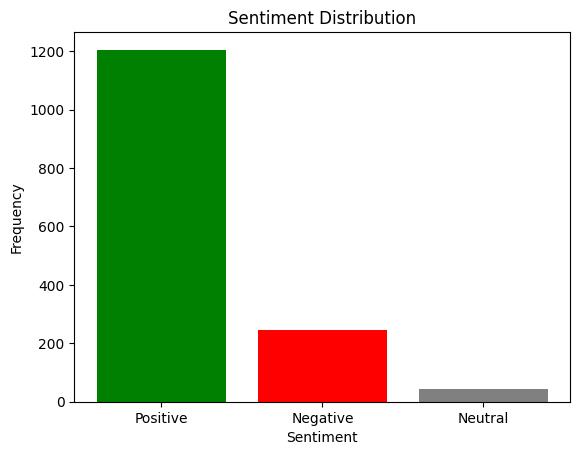

In [29]:
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment_Label'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

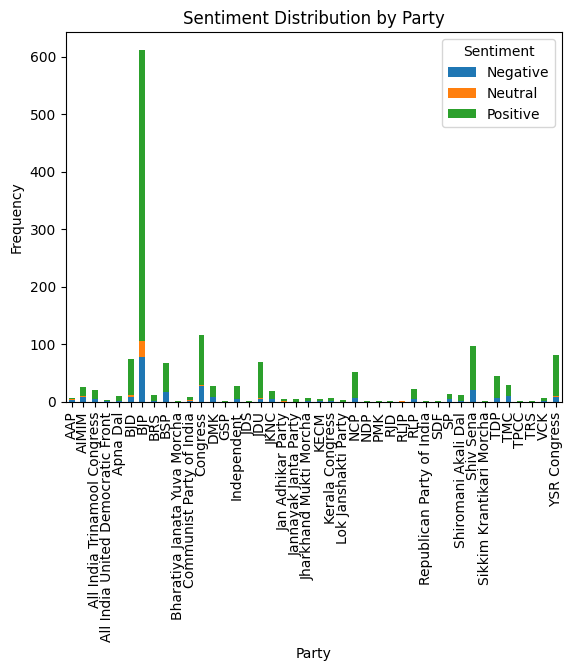

In [30]:
party_sentiment_counts = df.groupby(['Party', 'Sentiment_Label']).size().unstack(fill_value=0)

party_sentiment_counts.plot(kind='bar', stacked=True)
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution by Party')
plt.legend(title='Sentiment')
plt.show()



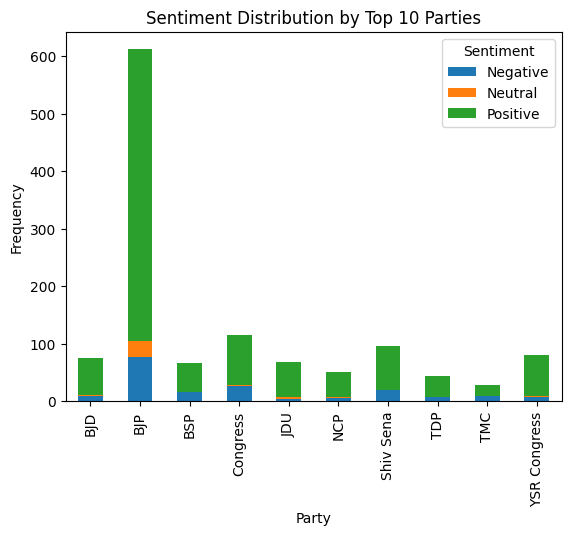

In [37]:
party_counts = df['Party'].value_counts()
top_10_parties = party_counts.head(10).index
party_sentiment_counts = df[df['Party'].isin(top_10_parties)].groupby(['Party', 'Sentiment_Label']).size().unstack(fill_value=0)

party_sentiment_counts.plot(kind='bar', stacked=True)
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution by Top 10 Parties')
plt.legend(title='Sentiment')
plt.show()

In [38]:
# Save the figure with specified DPI
plt.savefig('sentiment.jpeg', dpi=300)

<Figure size 640x480 with 0 Axes>

In [ ]:
df_observed_parties = df[df['Party'].isin(top_10_parties)]
party_sentiment_counts = df_observed_parties.groupby(['Party', 'Sentiment']).size().unstack(fill_value=0)

party_total_speeches = party_sentiment_counts.sum(axis=1)

party_sentiment_percentage = party_sentiment_counts.div(party_total_speeches, axis=0) * 100
party_sentiment_percentage = party_sentiment_percentage[['Negative', 'Positive', 'Neutral']]

print("Percentage of Negative and Positive Sentiments in Parliamentary Speeches for Observed Parties:")
print(party_sentiment_percentage)


Percentage of Negative and Positive Sentiments in Parliamentary Speeches for Observed Parties:
Sentiment      Negative   Positive   Neutral
Party                                       
BJD           11.666667  85.000000  3.333333
BJP           13.078471  81.488934  5.432596
BSP           22.000000  78.000000  0.000000
Congress      21.111111  76.666667  2.222222
JDU            7.272727  89.090909  3.636364
NCP           12.500000  85.000000  2.500000
Shiv Sena     23.076923  76.923077  0.000000
TDP            9.090909  90.909091  0.000000
TMC           35.000000  62.500000  2.500000
YSR Congress   8.333333  88.333333  3.333333


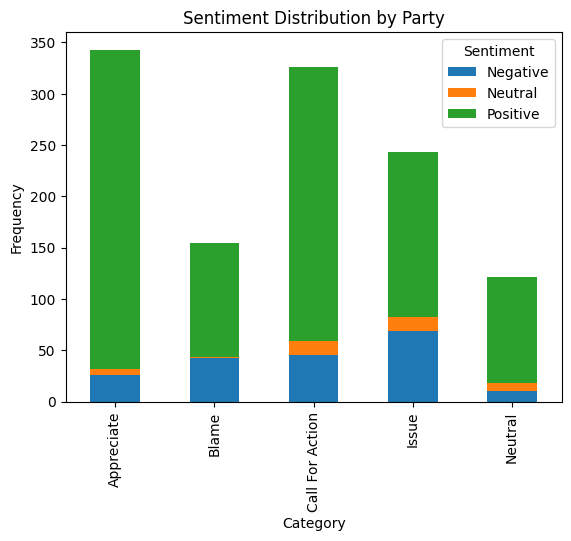

In [ ]:
party_sentiment_counts = df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)

party_sentiment_counts.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution by Party')
plt.legend(title='Sentiment')
plt.show()

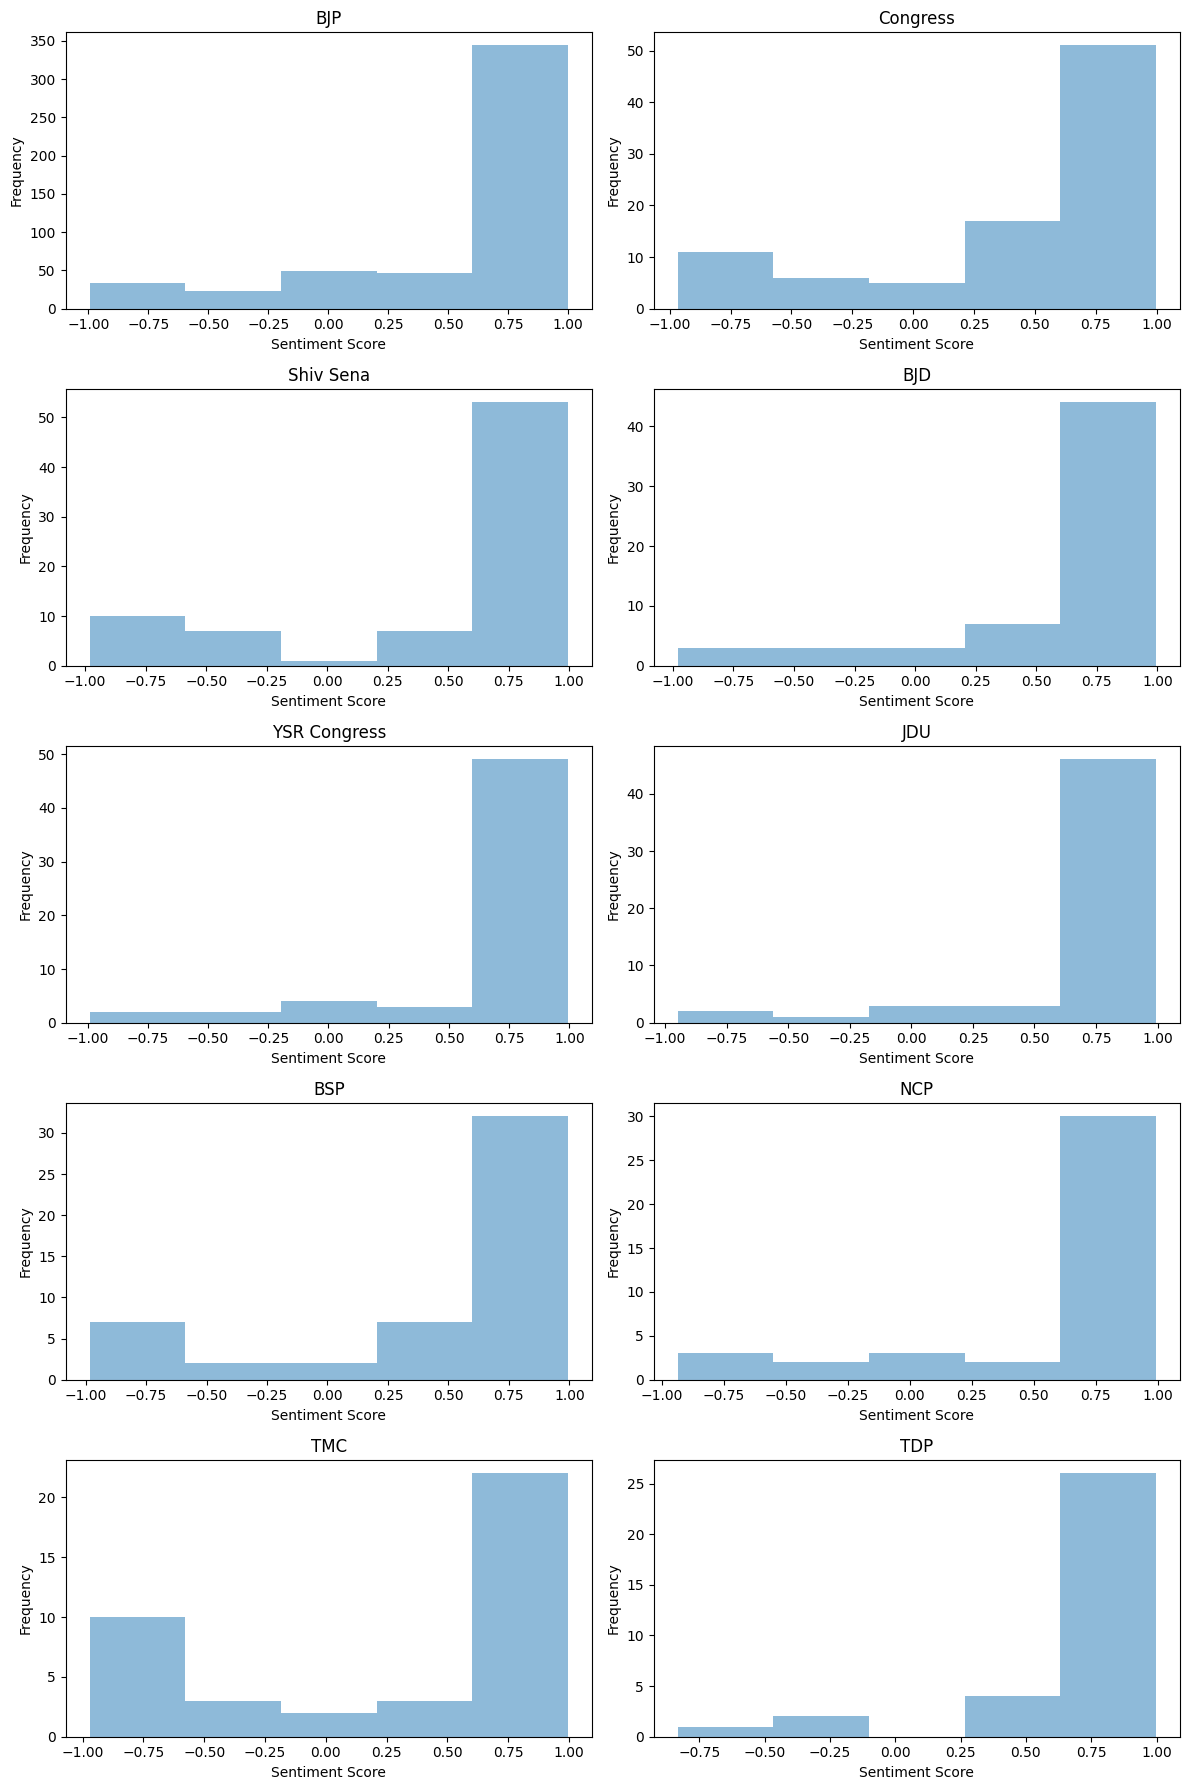

In [ ]:
# Plot histograms for each party
fig, axs = plt.subplots(5, 2, figsize=(12, 18))
axs = axs.flatten()
for i, party in enumerate(top_10_parties):
    party_data = df[df['Party'] == party]
    axs[i].hist(party_data['Sentiment_Score'], bins=5, alpha=0.5)
    axs[i].set_title(party)
    axs[i].set_xlabel('Sentiment Score')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

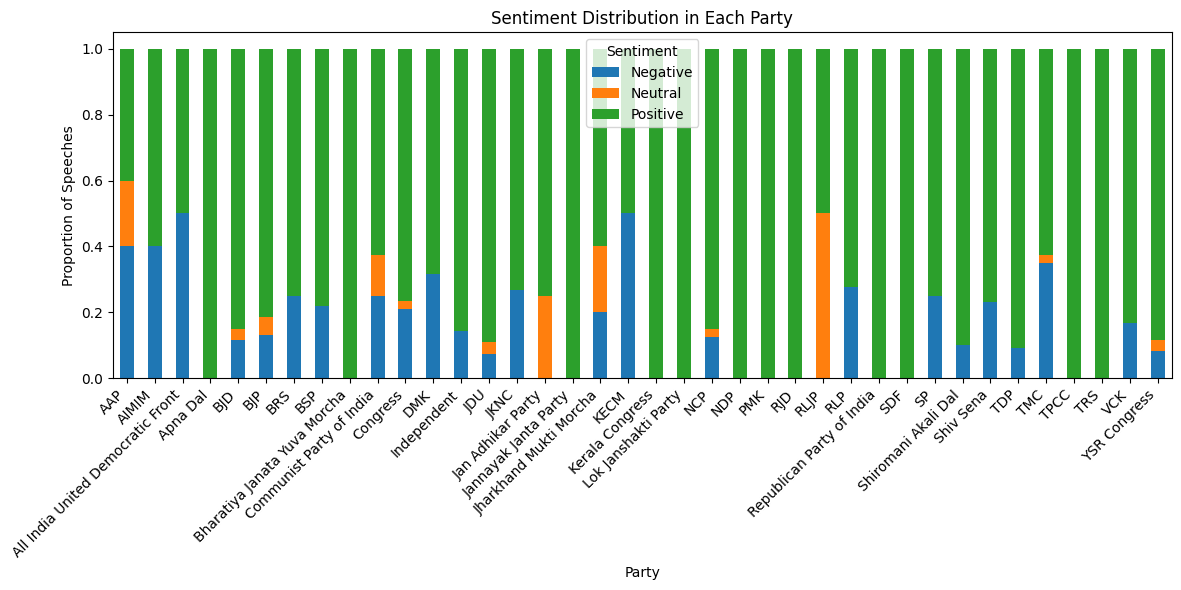

In [ ]:
party_sentiment_distribution = df.groupby('Party')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

party_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Party')
plt.ylabel('Proportion of Speeches')
plt.title('Sentiment Distribution in Each Party')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###Key Word Extraction RAKE

In [ ]:
# Initialize RAKE
rake = Rake()

# Function to extract keywords using RAKE
def extract_keywords_rake(text):
    # keywords
    rake.extract_keywords_from_text(text)
    ranked_phrases = rake.get_ranked_phrases_with_scores()

    # top keywords
    keywordList = []
    for keyword in ranked_phrases:
        keyword_updated = keyword[1].split()
        keyword_updated_string = " ".join(keyword_updated[:2])
        keywordList.append(keyword_updated_string)
        if len(keywordList) > 9:
            break

    return keywordList
df['Keywords_RAKE'] = df['Preprocessed_Speech'].apply(lambda x: extract_keywords_rake(' '.join(x)))


# Print the extracted keywords for each speech
for index, row in df.iterrows():
    print(f"Speech {index}:")
    print("Keywords (RAKE):", row['Keywords_RAKE'])
    print()

Speech 0:
Keywords (RAKE): ['country characterised']

Speech 1:
Keywords (RAKE): ['would like']

Speech 2:
Keywords (RAKE): ['would like']

Speech 3:
Keywords (RAKE): ['lord ram']

Speech 4:
Keywords (RAKE): ['unprecedented work']

Speech 5:
Keywords (RAKE): ['fortunate born']

Speech 6:
Keywords (RAKE): ['happy lord']

Speech 7:
Keywords (RAKE): ['elected th']

Speech 8:
Keywords (RAKE): ['elected lok']

Speech 9:
Keywords (RAKE): ['would like']

Speech 10:
Keywords (RAKE): ['stand motion']

Speech 11:
Keywords (RAKE): ['judgement ram']

Speech 12:
Keywords (RAKE): ['parliament got']

Speech 13:
Keywords (RAKE): ['thank voter']

Speech 14:
Keywords (RAKE): ['way everyone']

Speech 15:
Keywords (RAKE): ['hon speaker']

Speech 16:
Keywords (RAKE): ['speaking ram']

Speech 17:
Keywords (RAKE): ['take opportunity']

Speech 18:
Keywords (RAKE): ['lok sabha']

Speech 19:
Keywords (RAKE): ['selected member']

Speech 20:
Keywords (RAKE): ['entered th']

Speech 21:
Keywords (RAKE): ['salute ho

##Key Word Extraction using KeyBERT

KeyBERT is a straightforward and user-friendly keyword extraction technique that leverages BERT embeddings to identify the most similar keywords and keyphrases within a given document. It relies on BERT embeddings and employs basic cosine similarity to pinpoint sub-documents within the text that closely resemble the document as a whole.

To create a document-level representation, BERT is utilized for extracting document embeddings. Subsequently, word embeddings for N-gram words/phrases are extracted. Finally, cosine similarity is applied to identify words/phrases that closely resemble the document, allowing for the identification of terms that best encapsulate the entire document.

KeyBert utilizes huggingface transformer-based pre-trained models to generate embeddings, with the default choice being the all-MiniLM-L6-v2 model.

In [ ]:
# Initialize KeyBERT model
kw_model = KeyBERT()

# Function to extract keywords using KeyBERT
def extract_keywords_keybert(text):
    keywords = kw_model.extract_keywords(text)
    return keywords

df['Keywords_KeyBERT'] = df['Preprocessed_Speech'].apply(lambda x: extract_keywords_keybert(' '.join(x)))

for index, row in df.iterrows():
    print(f"Speech {index}:")
    print("Keywords with Scores (KeyBERT):", row['Keywords_KeyBERT'])
    print()


Speech 0:
Keywords with Scores (KeyBERT): [('gandhiji', 0.5121), ('gandhi', 0.4641), ('rajya', 0.4597), ('hindu', 0.4304), ('indian', 0.3856)]

Speech 1:
Keywords with Scores (KeyBERT): [('ramayana', 0.4972), ('rama', 0.4891), ('ramaana', 0.456), ('rajya', 0.4141), ('temple', 0.3765)]

Speech 2:
Keywords with Scores (KeyBERT): [('mandir', 0.482), ('temple', 0.446), ('gratitude', 0.4316), ('bihar', 0.3705), ('shri', 0.3603)]

Speech 3:
Keywords with Scores (KeyBERT): [('mandir', 0.379), ('ramchandra', 0.3691), ('shri', 0.3541), ('temple', 0.3166), ('caste', 0.3087)]

Speech 4:
Keywords with Scores (KeyBERT): [('sabha', 0.483), ('leadership', 0.3735), ('unprecedented', 0.35), ('speaker', 0.3438), ('lok', 0.3233)]

Speech 5:
Keywords with Scores (KeyBERT): [('ayodhya', 0.4056), ('prayer', 0.3612), ('india', 0.3458), ('pranpratishtha', 0.3391), ('fortunate', 0.332)]

Speech 6:
Keywords with Scores (KeyBERT): [('ramchandra', 0.404), ('chandra', 0.3918), ('hindu', 0.3799), ('rama', 0.3568), 